<a href="https://colab.research.google.com/github/NityaVerma19/Movie-recommendation/blob/master/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Reading dataset file
dataset = pd.read_csv("C:\Users\admin\Desktop\python workspace\clean_final.csv")


In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv("/clean_final.csv")

In [ ]:
#To inspect the shape of the datset
dataset.shape

(612773, 4)

In [ ]:
#To find the distribution of different ratings in the datset
d = dataset.groupby('Rating')['Rating'].agg(['count'])
d =pd.DataFrame(d)
d

,count
Rating,
1.0,22894
2.0,56864
3.0,175853
4.0,219257
5.0,137905


 the count of missing values in the 'Rating' column of the dataset is 0







 there are no missing values in the 'Rating' column, cust_count would simply represent the count of unique customer IDs in the dataset.

In [ ]:
# get rating count

rating_count = dataset['CustomerID'].count() - movie_count
rating_count

612773

In [ ]:
!sed -n '72p' /movie_titles_final.csv

71,1995,Maya Lin: A Strong Clear Vision,,,


In [ ]:
import pandas as pd
df_title = pd.read_csv('/content/movie_titles_final.csv', encoding='ISO-8859-1',usecols = ['MovieID', 'YearOfRelease', 'Title'],on_bad_lines ='skip')


In [ ]:
df_title.set_index('MovieID', inplace = True)

print (df_title.head(10))

         YearOfRelease                         Title
MovieID                                             
1               2003.0               Dinosaur Planet
2               2004.0    Isle of Man TT 2004 Review
3               1997.0                     Character
4               1994.0  Paula Abdul's Get Up & Dance
5               2004.0      The Rise and Fall of ECW
6               1997.0                          Sick
7               1992.0                         8 Man
8               2004.0    What the #$*! Do We Know!?
9               1991.0      Class of Nuke 'Em High 2
10              2001.0                       Fighter


In [ ]:
# Import required libraries
import math
import re
import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162994 sha256=5f95f9bf6fe490954eefd848cce388773ed8788cdf57db02426480d12f09077a
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(dataset[['CustomerID', 'MovieID', 'Rating']], reader)

# Use the SVD algorithm.


svd = SVD()
svd.fit(data.build_full_trainset())
print(svd)

In [ ]:
import numpy as np

# Calculate singular values
singular_values = np.sqrt(np.sum(svd.pu ** 2, axis=0))

# Print singular values
print("Singular values:")
print(singular_values)


Singular values:
[33.45306488 31.05697058 30.83104969 31.98314728 31.26289228 35.10951068
 35.77519225 32.05830256 35.04825655 30.84146702 33.63111785 32.26145492
 31.18918735 31.1487512  33.04698316 31.20499865 32.47567405 31.22756952
 31.62607933 31.89583421 32.03988457 33.62771687 31.37447064 31.6515774
 31.80175457 31.9503965  33.080459   31.75013429 36.88813655 32.46366456
 31.33036257 33.55453142 31.04244426 32.71801266 31.64259777 34.38162929
 31.21563187 30.94942563 31.49589589 35.51283591 36.47311683 31.12679599
 30.76831662 33.56545956 33.96642282 30.64666651 30.86675934 33.61492997
 33.87366737 31.2900484  31.5695987  31.87558999 32.25361976 31.17679545
 31.76741353 32.58888069 32.47382868 30.91827982 35.5389884  31.55585003
 32.00856109 31.49482992 31.76477295 31.81328832 32.71616636 35.7114558
 40.89129166 33.75484552 33.46650944 33.48176088 32.59930791 32.32459662
 33.43935498 32.05762788 32.1799585  31.40091964 33.13074211 34.01866215
 31.05017406 31.34580261 30.8688102 

In [ ]:
# Left singular vectors (U)
print("Left singular vectors (U):")
print(svd.pu)

# Right singular vectors (V)
print("Right singular vectors (V):")
print(svd.qi)

Left singular vectors (U):
[[-0.22151471  0.17586782  0.02337233 ... -0.18225853 -0.24464629
   0.18060394]
 [-0.03994498 -0.0220312  -0.08424827 ...  0.010636   -0.02535746
   0.0361546 ]
 [-0.01098832  0.00440834  0.02473623 ... -0.00555965  0.0161733
   0.148728  ]
 ...
 [ 0.21715139 -0.0390662   0.02813474 ...  0.0899206  -0.01075316
  -0.00858779]
 [ 0.24720377 -0.23122797  0.07408937 ... -0.13498793  0.00772821
  -0.08948788]
 [ 0.1209878  -0.05947901 -0.01707384 ...  0.00792945 -0.08564418
  -0.0441241 ]]
Right singular vectors (V):
[[ 0.11259215 -0.21237426 -0.3357605  ... -0.56198787  0.66344975
   0.3194297 ]
 [-0.09721091  0.46317062  0.08636124 ... -0.0465901  -0.19487771
   0.09336411]
 [ 0.14228359 -0.0613939   0.23517152 ...  0.06452653 -0.02208315
  -0.11354272]
 ...
 [-0.1622169  -0.11930657 -0.02095228 ... -0.02068195  0.28329486
   0.09701853]
 [-0.07241763 -0.54460147 -0.2283734  ...  0.05806015  0.06131192
  -0.03535263]
 [ 0.0067868   0.47416695  0.12876138 ... -0

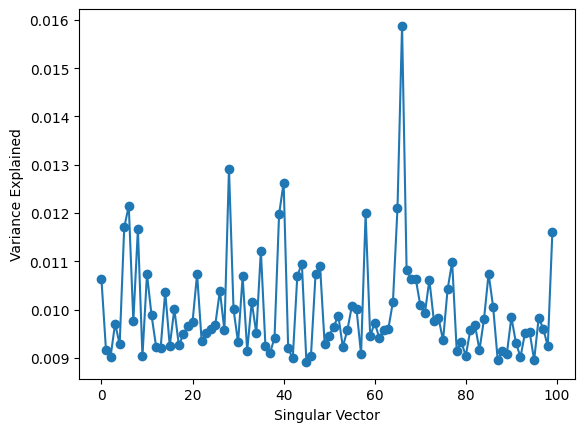

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate variance explained by each singular value
variance_explained = (singular_values ** 2) / np.sum(singular_values ** 2)

# Plot variance explained
plt.plot(variance_explained, marker='o')
plt.xlabel("Singular Vector")
plt.ylabel("Variance Explained")
plt.show()



In [ ]:
# Reconstruct the data using the first k singular vectors
def reconstruct_data(svd, k):
    # Obtain the singular vectors and values
    U = svd.pu[:, :k]
    S = np.diag(singular_values[:k])
    Vt = svd.qi[:k, :]

    # Reconstruct the data
    reconstructed_data = np.dot(np.dot(U, S), Vt)
    return reconstructed_data

# Reconstruct data using different numbers of singular vectors
reconstructed_data_5 = reconstruct_data(svd, 5)
reconstructed_data_10 = reconstruct_data(svd, 10)
reconstructed_data_25 = reconstruct_data(svd, 25)
reconstructed_data_35 = reconstruct_data(svd, 35)
reconstructed_data_85 = reconstruct_data(svd, 85)


In [ ]:
reconstruct_data(svd, 85)

array([[  1.53013316, -10.74261514,   6.78006659, ...,  22.26753122,
         -6.31228186,  -1.27826771],
       [ -3.98557601,   2.81267932,   0.0698399 , ...,  -1.636031  ,
          3.30621469,   5.90669755],
       [ -3.8959896 ,   0.46812337,  -2.66037299, ..., -11.20537543,
         -2.85671938, -12.17049365],
       ...,
       [  3.33435565,   7.32972189,   9.96256697, ..., -16.22872484,
          5.60678791,   0.33397664],
       [  6.57434501, -11.08328323,  -7.78656344, ...,   7.85078446,
          0.34163637,   2.89348494],
       [ -0.73865831,  -7.57807726,  -5.44771087, ...,   1.06711368,
          7.51268881,  -8.74074574]])

In [ ]:
dataset

,MovieID,CustomerID,Rating,Title
0,8,785314,1,What the #$*! Do We Know!?
1,8,243963,3,What the #$*! Do We Know!?
2,8,1447783,4,What the #$*! Do We Know!?
3,8,1912665,1,What the #$*! Do We Know!?
4,8,1744889,1,What the #$*! Do We Know!?
...,...,...,...,...
4137064,1509,692577,5,National Lampoon's Van Wilder
4137065,1509,2177386,3,National Lampoon's Van Wilder
4137066,1509,2240642,4,National Lampoon's Van Wilder
4137067,1509,1254501,4,National Lampoon's Van Wilder


In [ ]:
df_title

,YearOfRelease,Title
MovieID,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


svd.bu: This attribute contains the user biases, which represent the average rating given by each user. You can access it directly after training the SVD algorithm.

In [ ]:
 svd.bu

array([-0.53546312,  0.73032766, -0.18326646, ...,  0.08959801,
        0.01712564,  0.12834702])

svd.bi: This attribute contains the item biases, representing the average rating received by each item. Similarly, you can access it directly after training.

In [ ]:
svd.bi

array([-4.20260203e-01, -8.22210367e-01,  1.76646726e-01, -9.51374054e-01,
        2.15807446e-01,  1.25070909e-01,  5.85736599e-01,  1.97318157e-02,
        1.49657500e-01, -1.08713943e-01, -8.12011836e-01, -7.00521777e-01,
        7.22002901e-02,  2.68636958e-01, -4.14375382e-01, -7.01614291e-01,
       -2.10785871e-01,  2.36069832e-01,  3.39044199e-01, -5.28291212e-01,
        2.16799221e-01, -8.53741785e-02,  3.46397117e-01, -4.45297727e-02,
        4.04568866e-01,  1.31122721e-01,  5.77381466e-01, -3.87034434e-01,
       -2.45797943e-01,  3.21694974e-01, -2.85935807e-01,  2.22993870e-01,
        4.94209905e-01,  3.47941415e-01, -3.89120028e-01,  5.46137204e-01,
       -1.17953720e+00, -3.92453411e-01,  3.71522359e-01,  6.39184279e-01,
       -3.51684952e-02, -4.79600622e-01,  5.19227065e-01, -6.98806845e-01,
       -6.27719502e-02,  2.01826978e-01, -7.15221583e-02,  1.45224327e-01,
        1.15537796e-01,  4.66332145e-01, -6.35954500e-01, -7.50941177e-02,
       -4.32023347e-03, -

In [ ]:
# getting full dataset
data = Dataset.load_from_df(dataset[['CustomerID', 'MovieID', 'Rating']], reader)

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD
# Assuming df_title and dataset are already defined
def get_top_recommendations(user_id, df_title, dataset):
    # Filter dataset for movies rated 5 by the given user
    dataset_user = dataset[(dataset['CustomerID'] == user_id) & (dataset['Rating'] == 5)]
    dataset_user = dataset_user.set_index('MovieID')
    dataset_user = dataset_user.join(df_title.rename(columns={'Title': 'Title_df_title'}))
    if dataset_user.empty:
        return "No ratings available for the specified user."
    # Create a shallow copy of the movies dataset
    user_movies = df_title.copy()
    user_movies = user_movies.reset_index()
    # Load dataset for Surprise
    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(dataset[['CustomerID', 'MovieID', 'Rating']], reader)

    # Predict ratings for the user
    user_movies['Estimate_Score'] = user_movies['MovieID'].apply(lambda x: svd.predict(user_id, x).est)

    # Drop extra columns
    user_movies = user_movies.drop('MovieID', axis=1)
    movies_seen_by_user = dataset_user.index.tolist()
    user_movies = user_movies[~user_movies.index.isin(movies_seen_by_user)]
    # Sort predicted ratings in descending order
    user_movies = user_movies.sort_values('Estimate_Score', ascending=False)

    # Return top 5 recommendations
    return user_movies.head(5)




In [ ]:
# Example usage:
user_id = 716091
top_recommendations = get_top_recommendations(user_id, df_title, dataset)
print(top_recommendations)

     YearOfRelease                              Title  Estimate_Score
676         2001.0               In the Mood for Love        5.000000
404         1987.0                    Wings of Desire        5.000000
32          2000.0     Aqua Teen Hunger Force: Vol. 1        4.937098
255         2000.0  Ghost Dog: The Way of the Samurai        4.910764
871         1954.0                      Seven Samurai        4.903558


this lambda function is predicting the ratings that the given user would give to each movie in user_movies

This prediction is based on the ratings given by similar users in the dataset.

Think of it like this: the magic box (the predict() method) looks at all the movies you've already rated and compares them to the movie we're trying to predict for. It also looks at how other people have rated similar movies. Then, it uses all this information to make a guess about how much you'd like the movie we're interested in.
So, the prediction is based on two main things:

Your past ratings: The magic box looks at the movies you've already watched and rated. If you've given high ratings to movies that are similar to the one we're trying to predict for, it's likely that you'll also like this movie.
Similar movies and other people's ratings: The magic box also looks at how other people have rated movies that are similar to the one we're trying to predict for. If many people liked similar movies, it's more likely that you'll enjoy this one too.
By combining information from your past ratings and ratings from other people, the magic box tries to come up with a good guess for how much you'd like each movie.

In [ ]:
unique_customer_ids = sorted(dataset['CustomerID'].unique())
print(unique_customer_ids)



[6, 7, 79, 97, 134, 188, 195, 199, 201, 265, 283, 383, 437, 462, 477, 481, 527, 561, 596, 602, 609, 614, 684, 695, 735, 756, 769, 785, 906, 981, 1044, 1070, 1086, 1276, 1310, 1331, 1333, 1357, 1409, 1427, 1442, 1457, 1500, 1507, 1523, 1527, 1533, 1534, 1573, 1588, 1611, 1626, 1664, 1693, 1701, 1702, 1715, 1734, 1738, 1746, 1809, 1811, 1830, 1831, 1871, 1894, 1897, 1900, 1918, 1922, 1947, 2000, 2050, 2114, 2128, 2133, 2213, 2225, 2233, 2264, 2280, 2307, 2363, 2385, 2431, 2442, 2455, 2469, 2678, 2693, 2757, 2787, 2790, 2794, 2807, 2878, 2892, 2905, 2960, 2976, 3039, 3101, 3184, 3186, 3292, 3321, 3323, 3363, 3423, 3458, 3460, 3461, 3470, 3492, 3595, 3604, 3621, 3694, 3718, 3743, 3767, 3786, 3788, 3798, 3802, 3826, 3870, 3871, 3921, 3934, 3984, 3998, 4057, 4059, 4066, 4247, 4277, 4306, 4315, 4326, 4347, 4398, 4409, 4421, 4422, 4439, 4477, 4488, 4576, 4581, 4597, 4606, 4638, 4666, 4679, 4706, 4739, 4753, 4783, 4804, 4905, 4906, 4983, 5027, 5082, 5087, 5107, 5109, 5317, 5399, 5430, 5530, 556

In [ ]:
# Assuming dataset contains the user ratings data
# Filter dataset for user 7
user_7_data = dataset[dataset['CustomerID'] == 7]

# Extract movie IDs for movies rated by user 7
movies_seen_by_user_7 = user_7_data['MovieID'].unique()

print("Movies seen by user 7:")
print(movies_seen_by_user_7)

Movies seen by user 7:
[   8   28   30   83  175  191  257  273  283  285  299  313  329  348
  357  457  468  501  535  550  563  571  607  636  689  705  708  758
  798  886  896  937  940  963  989 1043 1046 1066 1102 1144 1145 1148
 1180 1202 1220 1289 1307 1314 1359 1406 1428 1470 1482]


In [ ]:
# Filter dataset for movies rated 5 by user 7
user_7_ratings = dataset[(dataset['CustomerID'] == 7) & (dataset['Rating'] == 5)]

# Extract unique movie IDs rated 5 by user 7
unique_movie_ids_rated_5_by_user_7 = user_7_ratings['MovieID'].unique()

# Print the unique movie IDs
print(unique_movie_ids_rated_5_by_user_7)

[   8   30   83  175  257  283  285  313  357  457  468  501  550  689
  798  963  989 1066 1144 1148 1180 1220 1307 1359 1482]
